# Python 2D-Dft Image processing
 

**In this project we want to do these step for our images:**
- take the image and transferm it to matrix
- transform it to dft
- get a filtre on it 
- get the inverse dft
- get the original image

**  <strong>note that</strong> this is not fft, so our complexity is n power 4 so our algorythm might be slow for larg scale images **

Let's get started!

<h2>Importing our Library</h2>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image,ImageDraw
import cmath

<p>In this step, I want to import Image. I want to work with just <strong>grayscale</strong>, so we convert our image into one layer image(L).<br> Then we get the pixels into an <strong>array</strong> so we can work with them.</p>

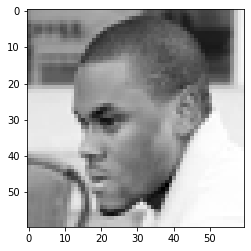

In [204]:
image = Image.open("profile.jpg").convert("L")

image = image.resize((60,60))
#get the pixels of image into array
f = np.asarray(image)
M, N = np.shape(f) # (img x, img y)
#show image
plt.imshow(f, cmap='gray')
plt.show()

<h3>Zero-Pad Image</h3>
<p>So we want to Pad our image with zeroes. our Image has the width and height with the size of <strong>M</strong> and <strong>N.&nbsp;</strong>The new array (Image) size is <strong>P</strong> and <strong>Q</strong>, where<strong> P = 2M-1</strong> and <strong>Q = 2N-1</strong>.</p>
<p>Our image is at the left top corner.</p>

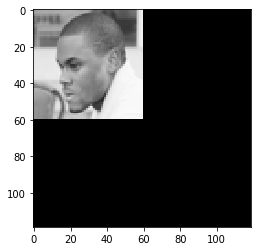

In [205]:
#padd image with size of P and Q
P,Q = M*2-1,N*2-1
shape = np.shape(f)
#our padded array
fp = np.zeros((P, Q))
#import our image into padded array
fp[:shape[0],:shape[1]] = f
plt.imshow(fp, cmap='gray',vmin=0, vmax=255)
plt.show()

to center its transform we should Multiply a new zero-padded image by this formula :

 $$ f_p(x,y) * (-1) ^{(x+y)}$$ 

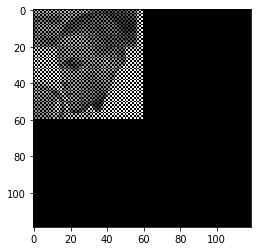

In [206]:
fpc = np.zeros((P, Q))
for x in range(P):
    for y in range(Q):
        fpc[x,y]=fp[x,y]*np.power(-1,x+y)

plt.imshow(fpc, cmap='gray',vmin=0, vmax=255)
plt.show()

# Fourier Transforms in Image Processing

A two dimensional fourier transform is needed for image processing. The formula is:
 $$X_{lm} =   \sum_{j=0}^{N-1}\sum_{k=0}^{M-1}X_{jk} e^{-2\pi i (\frac{jl}{N}+\frac{km}{M})} $$
 


In [219]:
def DFT2D(padded):
    M,N = np.shape(padded)
    dft2d = np.zeros((M,N),dtype=complex)
    for k in range(M):
        for l in range(N):
            sum_matrix = 0.0
            for m in range(M):
                for n in range(N):
                    e = cmath.exp(- 2j * np.pi * (float(k * m) / M + float(l * n) / N))
                    sum_matrix +=  padded[m,n] * e
            dft2d[k,l] = sum_matrix
    return dft2d

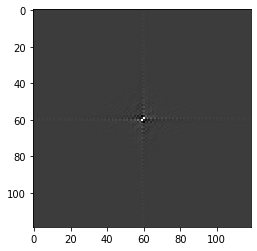

In [208]:
dft2d = DFT2D(fpc)
plt.imshow(dft2d.real, cmap='gray')
plt.show()

## Ideal Low-Pass Filter

ideal low-pass filter rules:
$$ D(u,v)= \sqrt{u^2+v^2} $$
$$ H(u,v) = 1-> when D(u,v) ≤ D0 , otherwise = 0 $$
$$ D0 = Cut-Off $$

but because we padded the image we need to get the center of our filter into U/2 and V/2

In [230]:
def lowPass(padded):
    #size of image
    U,V = np.shape(padded)
    #H is our filter
    H = np.zeros((U,V))
    D = np.zeros((U,V))
    U0 = int(U/2)
    V0 = int(V/2)
    #cut off
    D0 = 30
    for u in range(U):
        for v in range(V):
            u2 = np.power(u,2)
            v2 = np.power(v,2)
            D[u,v] = np.sqrt(u2+v2)
        
    for u in range(U):
        for v in range(V):        
            if D[np.abs(u-U0),np.abs(v-V0)] <= D0:
                H[u,v] = 1
            else:
                H[u,v] = 0
    return H

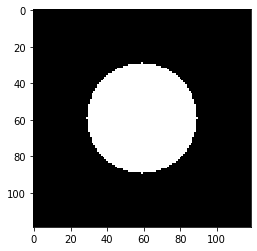

In [231]:
H = lowPass(dft2d)
plt.imshow(H,cmap="gray")
plt.show()

### for Apply the filter we get the multiply our image and our filter.

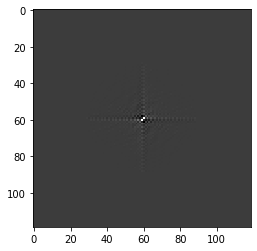

In [232]:
G=np.multiply(dft2d,H)
plt.imshow(G.real,cmap="gray")
plt.show()

 # Inverse DFT 
 now we should get the inverse of dft to get our real image. And Here is the Formula:
 $$X_{lm} = \frac{1}{N} \frac{1}{M}  \sum_{j=0}^{N-1}\sum_{k=0}^{M-1}X_{jk} e^{ 2\pi i (\frac{jl}{N}+\frac{km}{M})} $$

In [223]:
def IDFT2D(dft2d):
    M,N=dft2d.shape 
    pixels = np.zeros((M,N))
    for m in range(M):
        for n in range(N):
            sum_ = 0.0
            for k in range(M):
                for l in range(N):
                    e = cmath.exp(2j * np.pi * (float(k * m) / N + float(l * n) / M))
                    sum_ += dft2d[l][k] * e

            pixel = sum_.real/M/N
            pixels[n, m] = (pixel)
    return pixels

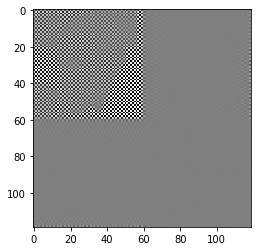

In [233]:
g = IDFT2D(G)
plt.imshow(g,cmap="gray")
plt.show()

so we neet to recenter our image again to get the full image

In [237]:
ga = np.asarray(g)
P,Q=np.shape(ga)
gp = np.zeros((P,Q))
for x in range(P):
    for y in range(Q):
        gp[x,y] = ga[x,y]*np.power(-1,x+y)

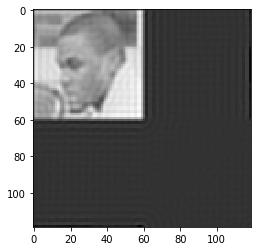

In [235]:
plt.imshow(gp,cmap="gray")
plt.show()

## Final step
we can obtain our final processed result by extractinh the M*N sub-region from top left of gp array

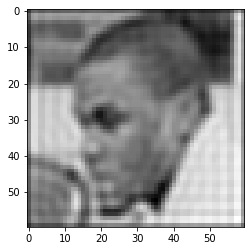

In [236]:
org_img=gp[:shape[0],:shape[1]]
plt.imshow(org_img,cmap='gray')
plt.show()